# AAL Sales Analysis Report – Q4 2020
Prepared by: Vrinda Pillai
Date: 07-Apr-2025
Objective: Analyze sales across Australian states and customer groups for Q4 2020 to support strategic decisions.


## 1. DATA WRANGLING
Load and Inspect Data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [8]:
df.shape

(7560, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [12]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [14]:
# Handling missing Data
df.isna().sum()
 

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Since there are no missing values, no further treatment is needed.

In [20]:
# Normalize Sales and Unit Column
scaler = MinMaxScaler()
df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


#### Use groupby() for data chunking to analyze trends across State, Group, and Time

## 2. DATA ANALYSIS

In [26]:
#Descriptive statistical analysis on the data (Sales and Unit columns) 
sales_desc = df['Sales'].describe()
unit_desc = df['Unit'].describe()
print("Descriptive Statistics - Sales:\n", sales_desc)
print("\n Descriptive Statistics - Unit:\n", unit_desc)

Descriptive Statistics - Sales:
 count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64

 Descriptive Statistics - Unit:
 count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Unit, dtype: float64


In [28]:
print("Mean Sales:", df['Sales'].mean())
print("Median Units:", df['Unit'].median())
print("Mode of Sales:", df['Sales'].mode()[0])
print("Standard Deviation (Units):", df['Unit'].std())

Mean Sales: 0.25405433778449654
Median Units: 0.19047619047619047
Mode of Sales: 0.1111111111111111
Standard Deviation (Units): 0.20478417107280086


### Group-wise and State-wise sales

In [34]:
# Group-wise total sales
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
# State-wise total sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
#Display Results
print("Group with Highest Sales:", group_sales.idxmax(), " ", round(group_sales.max(), 2))
print("Group with Lowest Sales:", group_sales.idxmin(), " ", round(group_sales.min(), 2))
print("\n Full Group-wise Sales:\n", group_sales)
print("State with Highest Sales:", state_sales.idxmax(), " ", round(state_sales.max(), 2))
print("State with Lowest Sales:", state_sales.idxmin(), " ", round(state_sales.min(), 2))
print("\n Full State-wise Sales:\n", state_sales)

Group with Highest Sales:  Men   484.44
Group with Lowest Sales:  Seniors   473.57

 Full Group-wise Sales:
 Group
Men        484.444444
Women      482.492063
Kids       480.142857
Seniors    473.571429
Name: Sales, dtype: float64
State with Highest Sales:  VIC   635.97
State with Lowest Sales:  WA   106.37

 Full State-wise Sales:
 State
VIC    635.968254
NSW    441.714286
SA     339.412698
QLD    177.888889
TAS    110.222222
NT     109.079365
WA     106.365079
Name: Sales, dtype: float64


### Weekly, Monthly, Quarterly Sales

In [37]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [43]:
weekly_sales = df.resample('W')['Sales'].sum()
monthly_sales = df.resample('ME')['Sales'].sum()
quarterly_sales = df.resample('QE')['Sales'].sum()

In [140]:
# Weekly sales Report
print("Weekly Sales Report:\n", weekly_sales.head())


Weekly Sales Report:
 Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
Freq: W-SUN, Name: Sales, dtype: float64


In [142]:
# Monthly sales Report

print("Monthly Sales Report:\n", monthly_sales)



Monthly Sales Report:
 Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: ME, Name: Sales, dtype: float64


In [144]:
# Quarterly sales Report

print("Quarterly Sales Report:\n", quarterly_sales)


Quarterly Sales Report:
 Date
2020-12-31    1920.650794
Freq: QE-DEC, Name: Sales, dtype: float64


In [150]:
# Monthly Sales by State
monthly_state_df = df.reset_index()
monthly_state_df['Month'] = monthly_state_df['Date'].dt.to_period('M').astype(str)

grouped = monthly_state_df.groupby(['Month', 'State'])['Sales'].sum().reset_index()

print("Monthly Sales by State Report:\n", grouped)


Monthly Sales by State Report:
       Month State       Sales
0   2020-10   NSW  147.349206
1   2020-10    NT   40.777778
2   2020-10   QLD   59.174603
3   2020-10    SA  119.428571
4   2020-10   TAS   39.460317
5   2020-10   VIC  200.904762
6   2020-10    WA   38.555556
7   2020-11   NSW  125.015873
8   2020-11    NT   21.952381
9   2020-11   QLD   40.063492
10  2020-11    SA   87.190476
11  2020-11   TAS   23.777778
12  2020-11   VIC  176.063492
13  2020-11    WA   21.698413
14  2020-12   NSW  169.349206
15  2020-12    NT   46.349206
16  2020-12   QLD   78.650794
17  2020-12    SA  132.793651
18  2020-12   TAS   46.984127
19  2020-12   VIC  259.000000
20  2020-12    WA   46.111111


In [158]:
#  Weekly Sales by States
weekly_state_sales = df.groupby('State').resample('W')['Sales'].sum().reset_index()
print("Weekly Sales by State Report:\n", weekly_state_sales)


Weekly Sales by State Report:
    State       Date      Sales
0    NSW 2020-10-04  19.952381
1    NSW 2020-10-11  34.746032
2    NSW 2020-10-18  33.634921
3    NSW 2020-10-25  34.936508
4    NSW 2020-11-01  28.333333
..   ...        ...        ...
93    WA 2020-12-06  10.412698
94    WA 2020-12-13  10.952381
95    WA 2020-12-20  10.063492
96    WA 2020-12-27  10.619048
97    WA 2021-01-03   4.730159

[98 rows x 3 columns]


In [164]:
# Quarterly sales by State

quarterly_state_df = df.reset_index()
quarterly_state_df['Quarter'] = quarterly_state_df['Date'].dt.to_period('Q').astype(str)

grouped1 = quarterly_state_df.groupby(['Quarter', 'State'])['Sales'].sum().reset_index()

print("Monthly Sales by State Report:\n", grouped1)


Monthly Sales by State Report:
   Quarter State       Sales
0  2020Q4   NSW  441.714286
1  2020Q4    NT  109.079365
2  2020Q4   QLD  177.888889
3  2020Q4    SA  339.412698
4  2020Q4   TAS  110.222222
5  2020Q4   VIC  635.968254
6  2020Q4    WA  106.365079


## 3. DATA VISUALIZATION
### SALES Dashboard for AAL(Head of S&M)
 Seaborn as the preferred visualization library as it is ideal for statistical plots. It works well for trend based visualisation.
 It can generate complex visualizations like boxplots, line plots, bar charts, and heatmaps with minimal code.
 

### State-wise analysis for different groups

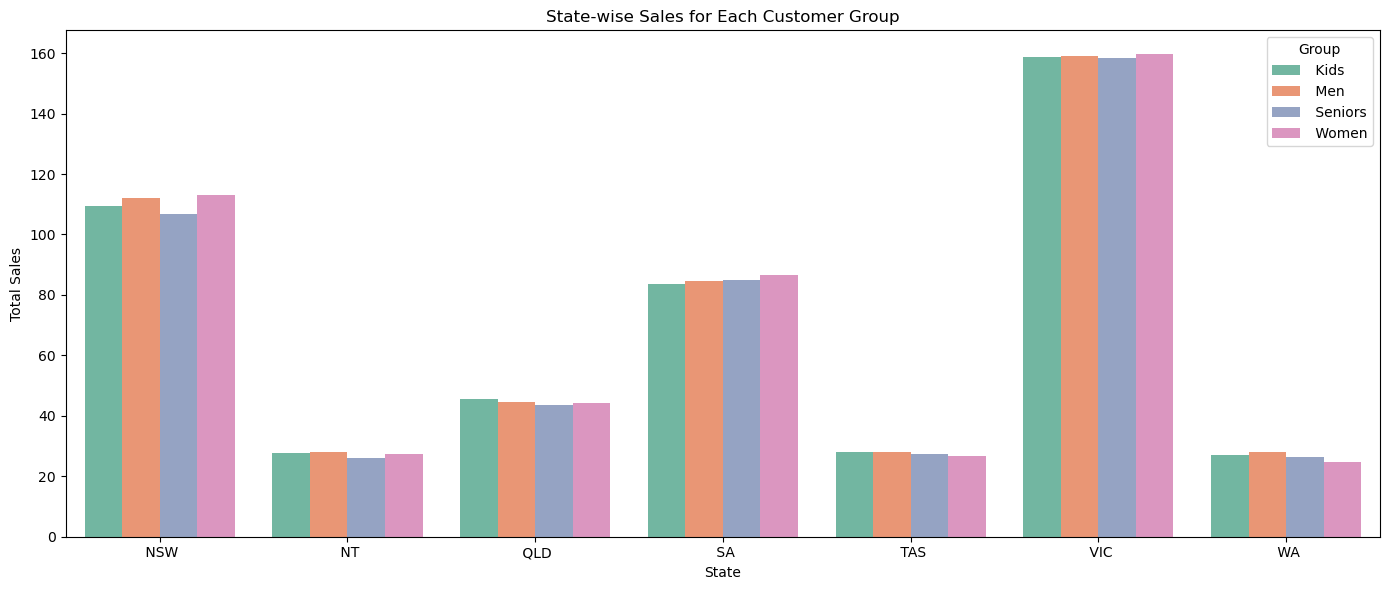

In [92]:
# Group data by State and Group and sum Sales
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=state_group_sales, x='State', y='Sales', hue='Group', palette='Set2')
plt.title('State-wise Sales for Each Customer Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

#### Satewise analysis for different groups:
Total sales by women group is more in almost all states except WA,TAS. VIC is the highest sale performing state and also there is a
balance in sales among all groups. All groups sales are very low in WA,TAS and NT. Among these states Women group sales is low in WA.
Compared to other groups , senior group sales is low in almost all states.


### Group-wise Sales analysis across States

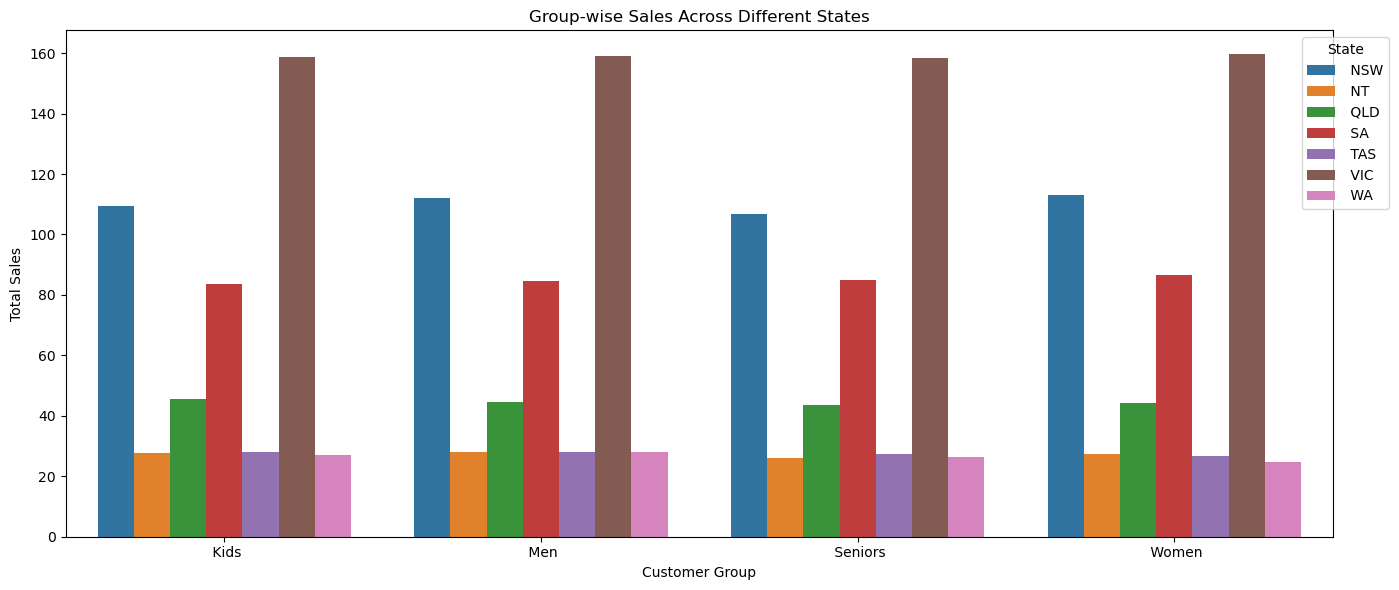

In [95]:
# Group data by Group and State and sum Sales
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=group_state_sales, x='Group', y='Sales', hue='State', palette='tab10')
plt.title('Group-wise Sales Across Different States')
plt.xlabel('Customer Group')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Group wise sales analysis across states
Irrespective of groups, maximum sales in VIC. 
All groups sales are low in WA especially Women group sale.
Sales improvement required among all groups in WA,TAS and NT
Senior group performance is slightly low in all states


### Time-of-DaySales Analysis 

In [98]:
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [106]:
time_sales = df.groupby('Time')['Sales'].sum().reindex([' Morning', ' Afternoon', ' Evening'])
time_sales.head()


Time
Morning      645.126984
Afternoon    643.857143
Evening      631.666667
Name: Sales, dtype: float64

C:\Users\vrinda\AppData\Local\Temp\ipykernel_9876\1118347646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_sales.index, y=time_sales.values, palette='coolwarm')


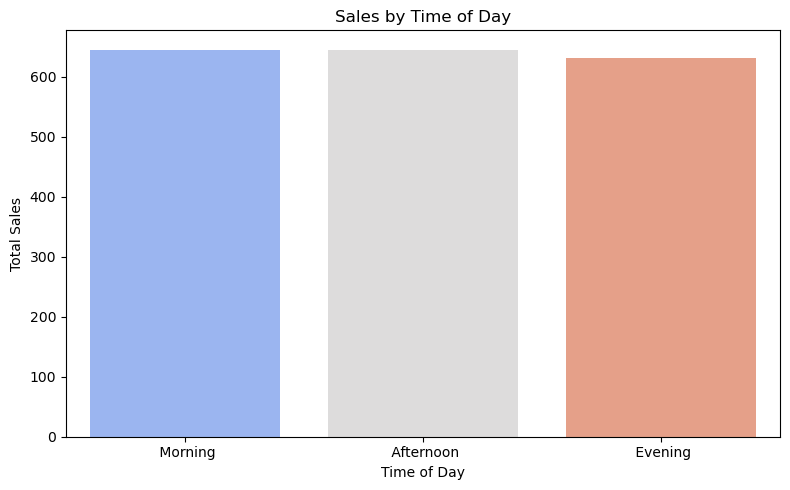

In [108]:
plt.figure(figsize=(8, 5))
sns.barplot(x=time_sales.index, y=time_sales.values, palette='coolwarm')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### Time of the day Sales analysis
Morning time sale is highest. Afternoon sales is slightly lower than Morning sales. Evening sales is less compared to
morning and afternoon sales

### Box Plot for Descriptive Statistics

C:\Users\vrinda\AppData\Local\Temp\ipykernel_9876\2416659374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='Sales', palette='pastel')


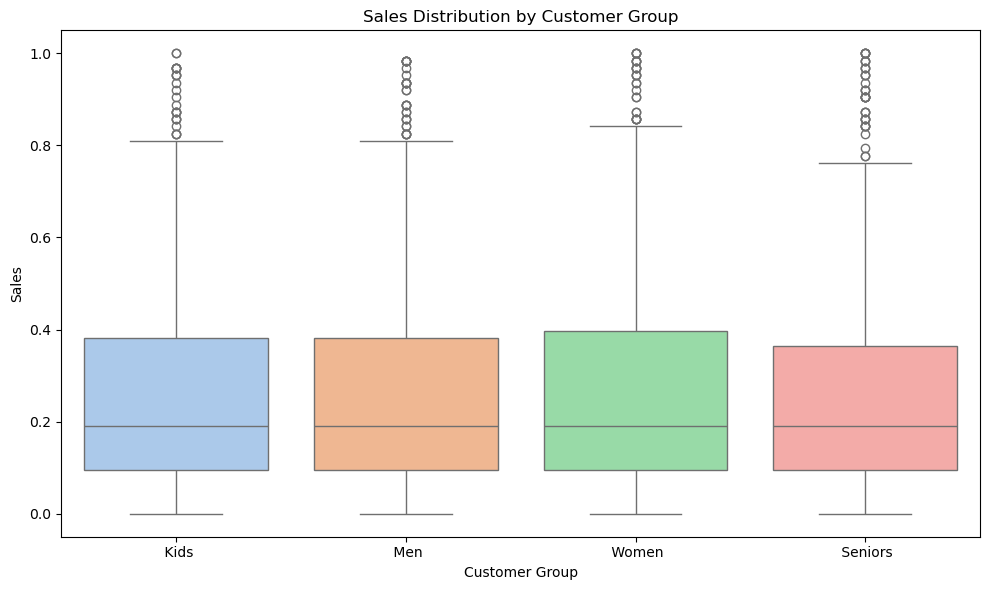

In [119]:
# Sales across customer group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Group', y='Sales', palette='pastel')
plt.title('Sales Distribution by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

C:\Users\vrinda\AppData\Local\Temp\ipykernel_9876\3315248226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='State', y='Sales', palette='Set3')


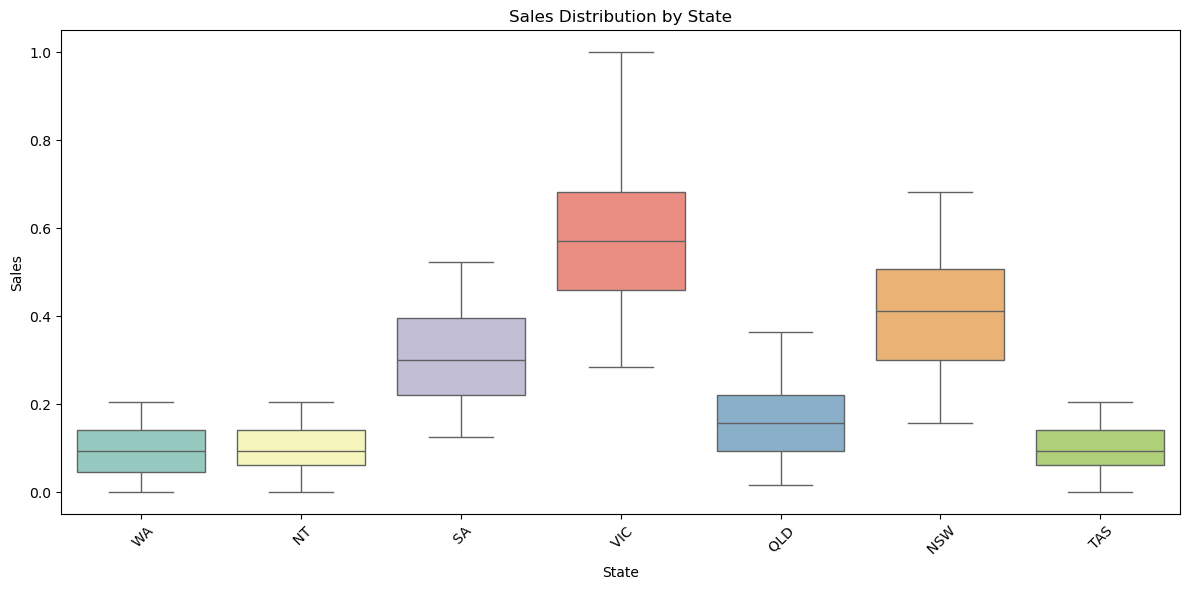

In [113]:
# Box plot for Sales by States
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='Sales', palette='Set3')
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vrinda\AppData\Local\Temp\ipykernel_9876\3142839495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='Unit', palette='coolwarm')


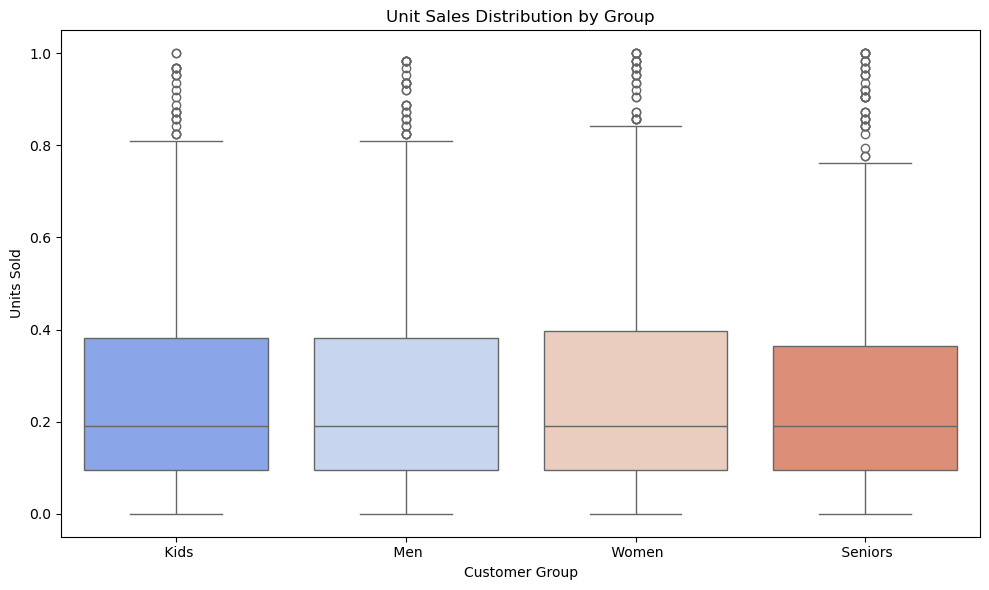

In [117]:
#Box plot for Unit sales across groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Group', y='Unit', palette='coolwarm')
plt.title('Unit Sales Distribution by Group')
plt.xlabel('Customer Group')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

### Insights from Box Plot

1. Sales Distribution by Customer group:
Seniors group has a narrow IQR, meaning their purchases are more consistent in value
Significant outliers in all groups and more in Senior group
Women group tend to have higher median sales compared to other groups
2. Sales distribution by states
   States like Tasmania and NT have low medians and narrow ranges, indicating low and stable sales.
   NSW and Victoria likely show higher median sales and wider spread, meaning strong but varied performance.
3. Unit Sale Distribution by Group
   Women group dominate in units sold, with wide IQRs
   More Outliers for Senior group and maximum unit sold is less for senior groups compared to other groups


### Daily Weekly Monthly Quarterly Sales Trends

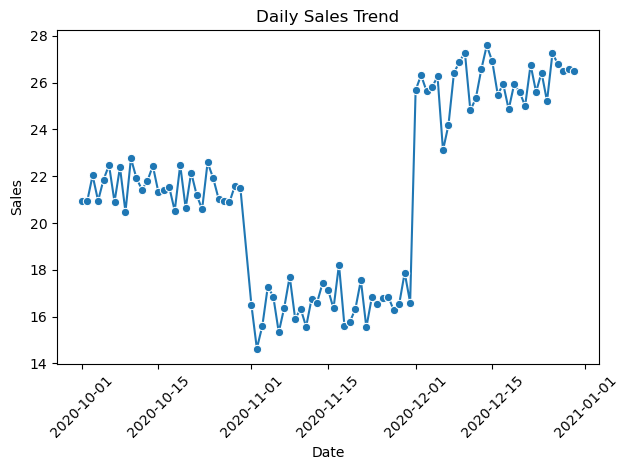

In [124]:
# Daily Sales Trend
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
sns.lineplot(data=daily_sales, x='Date', y='Sales', marker='o')
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

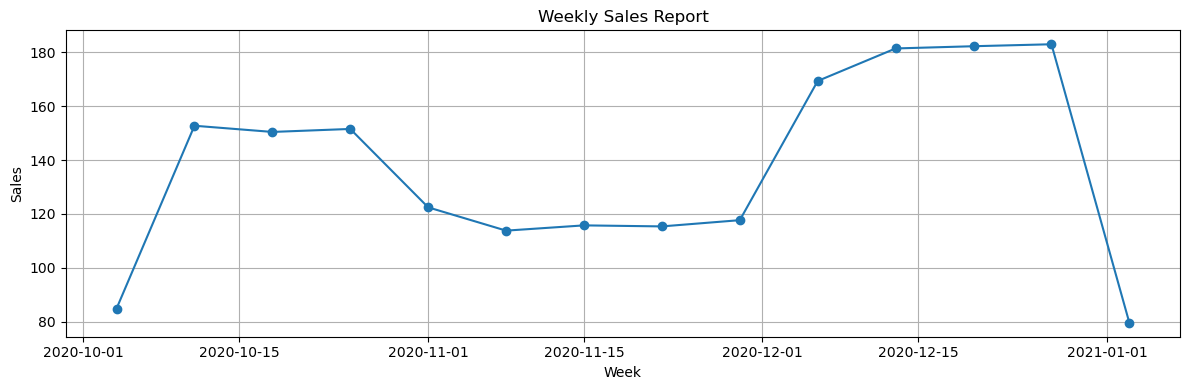

In [134]:

# Weekly Sales Trend
plt.figure(figsize=(12, 4))
plt.plot(weekly_sales, marker='o', linestyle='-')
plt.title("Weekly Sales Report")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\vrinda\AppData\Local\Temp\ipykernel_9876\1889226266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_df, x='Date', y='Sales', palette='Blues_d')


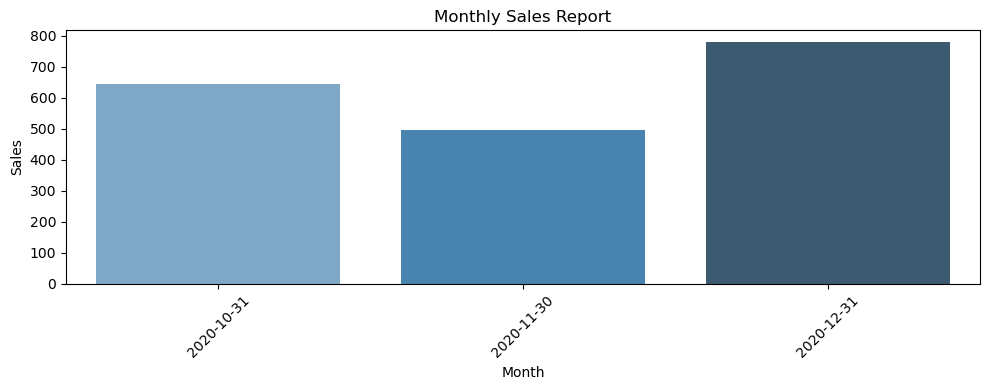

In [136]:
#Monthly Sales Trend
monthly_df = monthly_sales.reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=monthly_df, x='Date', y='Sales', palette='Blues_d')
plt.title("Monthly Sales Report")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vrinda\AppData\Local\Temp\ipykernel_9876\3347308375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_df, x='Date', y='Sales', palette='Oranges_d')


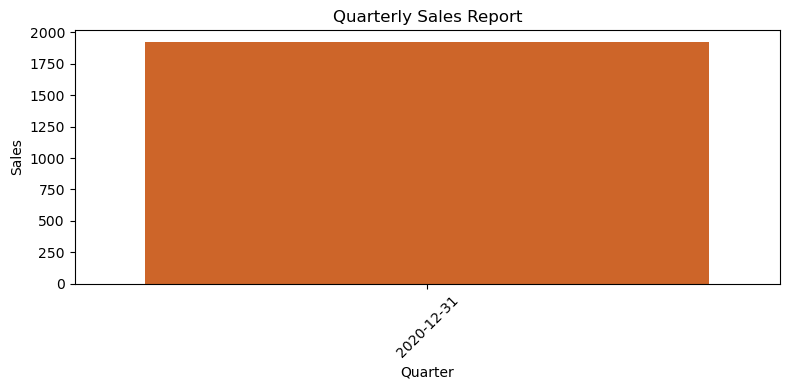

In [138]:
#Quarterly sales trend
quarterly_df = quarterly_sales.reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=quarterly_df, x='Date', y='Sales', palette='Oranges_d')
plt.title("Quarterly Sales Report")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

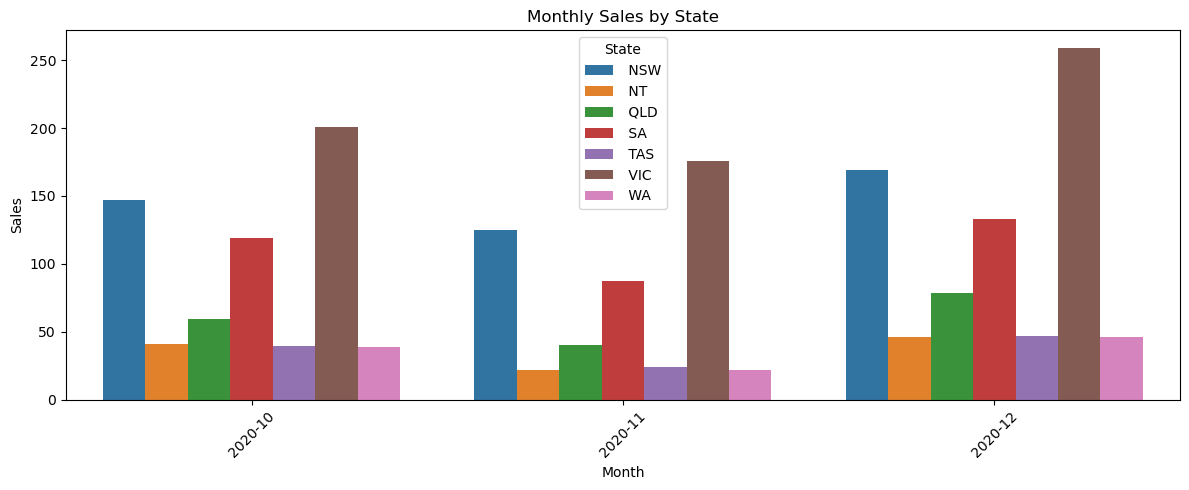

In [148]:
# Monthly Sales by State
monthly_state_df = df.reset_index()
monthly_state_df['Month'] = monthly_state_df['Date'].dt.to_period('M').astype(str)

grouped = monthly_state_df.groupby(['Month', 'State'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=grouped, x='Month', y='Sales', hue='State', palette='tab10')
plt.title("Monthly Sales by State")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()

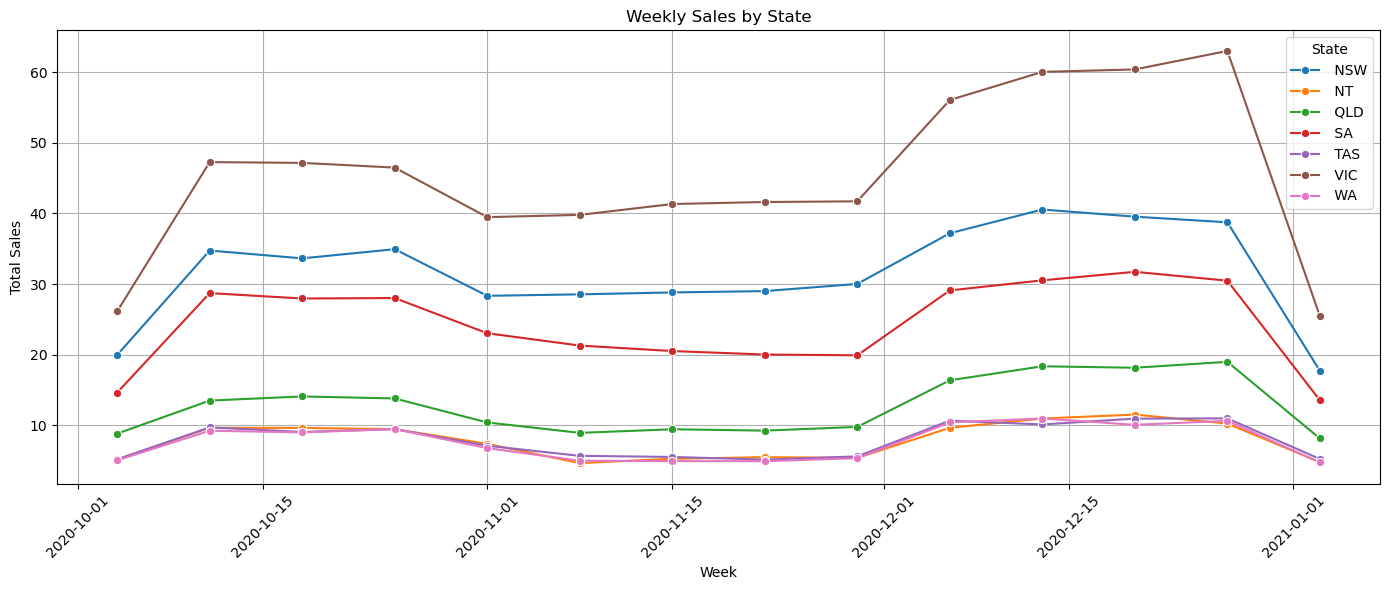

In [156]:
#  Weekly Sales by States
weekly_state_sales = df.groupby('State').resample('W')['Sales'].sum().reset_index()

# Plot with Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_state_sales, x='Date', y='Sales', hue='State', marker='o')

plt.title('Weekly Sales by State')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='State')
plt.grid(True)
plt.show()

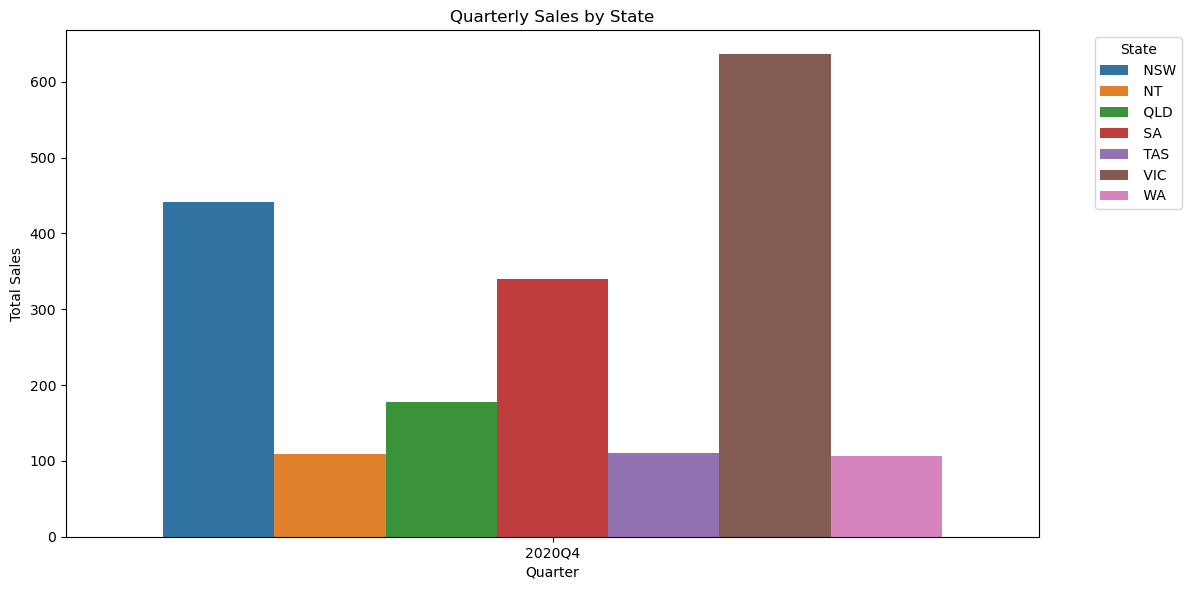

In [162]:
# Quarterly sales by State

quarterly_state_df = df.reset_index()
quarterly_state_df['Quarter'] = quarterly_state_df['Date'].dt.to_period('Q').astype(str)

grouped1 = quarterly_state_df.groupby(['Quarter', 'State'])['Sales'].sum().reset_index()

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped1, x='Quarter', y='Sales', hue='State', palette='tab10')

plt.title('Quarterly Sales by State')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Sales Trend Analysis Summary:

Monthly sales across states are high in December and Low in Novemeber.Sales was happening in a constant manner till end week of October and There is a decrease in sale can be seen in end week of october to all weeks of novemeber and it is not varying much. Sudden increase in sale found from first week of december and sales is highest in the mid weeks of december. Same patter is showed in all states while analysing state wise sales. Maximum sales in VIC state. WA,TAS and NT recorded minimum sales in the Q4 Quarter.


## 4. Insights & Recommendations
Key Insights:
NSW and VIC show the highest sales.
Seniors group comparitively underperforms in several regions.
Morning and Afternoon time slots show peak sales.
WA,TAS and NT shows lowest sales.
Women group sales is higher in almost all states


Recommendations:
Promote senior-focused campaigns in underperforming states.
Launch "Next Best Offers" for high-sales hours.
Expand investment in VIC and NSW.
More focus required in sales promotion in QLD and SA